In [ ]:
#Import necessary libraries
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import regularizers

2025-01-13 15:47:47.252083: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
# Load the dataset
csv_path = Path("../Resources/train_cleaned.csv")
df = pd.read_csv(csv_path)
pd.set_option('display.max_columns', None)
df.head()

,ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,0x1608,19114.12,1824.843333,3,4,3,4,3,8,4.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good,271
1,0x160f,34847.84,3037.986667,2,4,6,1,7,1,2.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good,320
2,0x1612,34847.84,3037.986667,2,4,6,1,3,1,2.0,Good,605.03,34.977895,No,18.816215,130.115420,444.867032,Good,323
3,0x1613,34847.84,3037.986667,2,4,6,1,3,0,2.0,Good,605.03,33.381010,No,18.816215,43.477190,481.505262,Good,324
4,0x1615,34847.84,3037.986667,2,4,6,1,3,4,2.0,Good,605.03,32.933856,No,18.816215,218.904344,356.078109,Good,326


In [56]:
# Step 1: Encode the target variable
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

# Step 2: Encode categorical variables
# Note: Added cat variables back into model and turns out the model is better
df = pd.get_dummies(df, columns=['Credit_Mix', 'Payment_of_Min_Amount'], drop_first=True)

# Step 3: Define features (X) and target (y)
X = df.drop(columns=['Credit_Score', 'ID'])
y = df['Credit_Score']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
num_features = len(X_train.columns)

In [55]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()

# Input layer with L2 regularization
nn_model.add(tf.keras.layers.Dense(
    units=11, 
    activation="tanh", 
    input_dim=num_features, 
    kernel_regularizer=regularizers.l2(0.01)  # L2 regularization
))

# Hidden layers with L2 regularization, Dropout, and Batch Normalization
nn_model.add(tf.keras.layers.Dense(
    units=36, 
    activation="tanh", 
    kernel_regularizer=regularizers.l2(0.01)
))
nn_model.add(tf.keras.layers.Dropout(0.3))  # Dropout for regularization
nn_model.add(tf.keras.layers.BatchNormalization())  # Batch normalization

nn_model.add(tf.keras.layers.Dense(
    units=46, 
    activation="tanh", 
    kernel_regularizer=regularizers.l2(0.01)
))
nn_model.add(tf.keras.layers.Dropout(0.3))
nn_model.add(tf.keras.layers.BatchNormalization())

nn_model.add(tf.keras.layers.Dense(
    units=21, 
    activation="tanh", 
    kernel_regularizer=regularizers.l2(0.01)
))
nn_model.add(tf.keras.layers.Dropout(0.3))
nn_model.add(tf.keras.layers.BatchNormalization())

nn_model.add(tf.keras.layers.Dense(
    units=10, 
    activation="tanh", 
    kernel_regularizer=regularizers.l2(0.01)
))
nn_model.add(tf.keras.layers.Dropout(0.3))
nn_model.add(tf.keras.layers.BatchNormalization())

nn_model.add(tf.keras.layers.Dense(
    units=20, 
    activation="tanh", 
    kernel_regularizer=regularizers.l2(0.01)
))
nn_model.add(tf.keras.layers.Dropout(0.3))
nn_model.add(tf.keras.layers.BatchNormalization())

nn_model.add(tf.keras.layers.Dense(
    units=50, 
    activation="tanh", 
    kernel_regularizer=regularizers.l2(0.01)
))
nn_model.add(tf.keras.layers.Dropout(0.3))
nn_model.add(tf.keras.layers.BatchNormalization())

# Output layer with softmax for multi-class classification
nn_model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)


# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.4894 - loss: 2.3324
Epoch 2/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5734 - loss: 1.2668
Epoch 3/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5901 - loss: 0.9408
Epoch 4/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5853 - loss: 0.8734
Epoch 5/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5905 - loss: 0.8518
Epoch 6/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5879 - loss: 0.8630
Epoch 7/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5886 - loss: 0.8493
Epoch 8/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5862 - loss: 0.8535
Epoch 9/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5947 - loss: 0.8467
Epoch 10/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5945 - loss: 0.8467
Epoch 11/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5879 - loss: 0.8522
Epoch 12/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/ste

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

207/207 - 1s - 3ms/step - accuracy: 0.6617 - loss: 0.7543
Loss: 0.7543215751647949, Accuracy: 0.6616621017456055


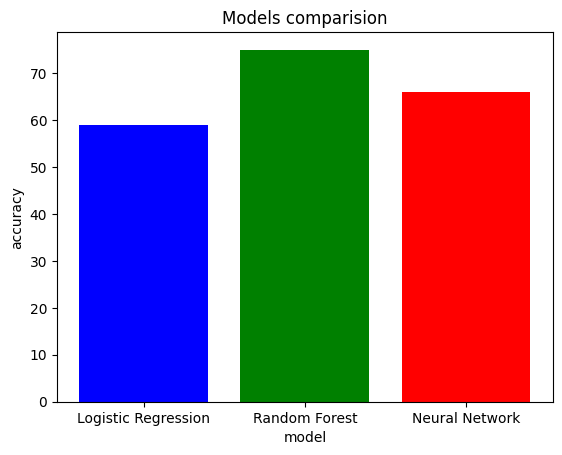

In [51]:
models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracy_scores = [59, 75, 66]

plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('Models comparision')
plt.show()